In [7]:
### Investigate coeGenes characteristics with Info from Mostafavi Paper

# Libraries

In [8]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [9]:
source('MS4_Plot_Config.r')

In [10]:
library(httr)

In [11]:
library(jsonlite)

# Parameters

In [363]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [364]:
data_path = '../data/current/coeqtl_mapping/'

In [365]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [366]:
coeqtl_results_path = 'co_qtls_decision_tree/'

In [367]:
meta_data_path  = "/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/meta-data/"

In [368]:
# Define cell-type for which enrichments should be calculated; alternative: All or cell-type name (CD4_T, CD8_T, Mono, NK, B)
cell_type = 'All'

In [369]:
### Define wheter to include or exclude ribosomal/ mitochondrial genes 

In [471]:
rm_rib_mt_egenes = FALSE
rm_rib_mt_coegenes = FALSE

# Data

## Load ribosomal/mitochondrial genes

In [66]:
### Load the annotation of ribosomal and mitochondrial genes

In [67]:
data_path_meta = '../data/current/meta-data'

In [68]:
ribosomal_genes = read.csv(paste0(data_path_meta , '/ribosomal_genes.txt.gz') ,sep = '\t')

In [69]:
ribosomal_genes = unique(ribosomal_genes$Gene.name)

In [70]:
head(ribosomal_genes)

[1] "ABCE1" "ABCF1" "APEX1" "APOD"  "ASCC2" "ASCC3"

In [73]:
### Mitochondrial genes

In [74]:
mitochondrial_genes = read.csv(paste0(data_path_meta , '/mitochondrial_genes.txt') ,sep = '\t')

In [75]:
head(mitochondrial_genes,2)

,Gene.stable.ID,Gene.stable.ID.version,Transcript.stable.ID,Transcript.stable.ID.version,Chromosome.scaffold.name,Gene.start..bp.,Gene.end..bp.
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2,MT,3307,4262
2,ENSG00000198763,ENSG00000198763.3,ENST00000361453,ENST00000361453.3,MT,4470,5511


In [76]:
### convert ENSG to SYMBOL

In [77]:
mitochondrial_genes_convert <- bitr(unique(mitochondrial_genes$Gene.stable.ID), 
                  fromType = "ENSEMBL", 
                  toType = "SYMBOL", 
                  OrgDb = org.Hs.eg.db)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(unique(mitochondrial_genes$Gene.stable.ID), fromType = "ENSEMBL", :
"2.14% of input gene IDs are fail to map..."


In [78]:
head(mitochondrial_genes_convert,2)

,ENSEMBL,SYMBOL
,<chr>,<chr>
1,ENSG00000198888,ND1
2,ENSG00000198763,ND2


In [79]:
mitochondrial_genes  = unique(mitochondrial_genes_convert$SYMBOL)

In [80]:
head(mitochondrial_genes)

[1] "ND1"  "ND2"  "COX1" "COX2" "ATP8" "ATP6"

In [81]:
### Combine

In [82]:
rb_mt_genes = unique(c(ribosomal_genes, mitochondrial_genes))

## Expression info of genes

In [18]:
summary_stats_info = data.frame()

In [19]:
cell_types  = c('CD4_T', 'CD8_T', 'Mono', 'NK', 'B')

In [20]:
datasets_to_load = c('Franke_split_v2', 'Franke_split_v3', 'wijst2018', 'oneK1k', 'multiome')

In [ ]:
for(i in datasets_to_load){
    for (j in cell_types){
        if(file.exists(paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv"))){
          
                result_file = fread( paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv")) # F12_Tests_after_filtering_normalized.csv --> after decision tree filtering; F3_decision_tree_input.csv

                result_file$dataset = i
                result_file$cell_type = j 
            
                ### aggregate on a gene level
                result_file = result_file %>% group_by(dataset, cell_type, gene) %>% summarise(amount_samples_non_zero = n(),
                                                                                 mean_amount_cells = mean(amount_cells),
                                                                                 mean_expression = mean(mean_counts),
                                                                                 mean_percentage_zero = mean(percentage_zero),
                                                                                 mean_non_zero_counts = mean(amount_non_zero_counts))
                #result_file$p_val_mt = NULL   # TBD: remove when this information has been added to all result files
                #result_file$q_val = NULL
                #result_file$co_egene = NULL
                summary_stats_info  = rbind(result_file, summary_stats_info )
    
            }
    }
    }
    

`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override using the `.groups`
argument.
`summarise()` has grouped output by '

In [24]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,B,A1BG,5,219.0000,0.04113295,94.49146,10.4
multiome,B,A1BG-AS1,3,154.6667,0.04690375,93.49882,10.0


In [25]:
unique(summary_stats_info$cell_type)

[1] "B"     "NK"    "Mono"  "CD8_T" "CD4_T"

In [26]:
### Adjust the dataset info

In [27]:
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'wijst2018', 'wijst')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v2', 'Franke_v2')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v3', 'Franke_v3')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'oneK1k', 'oneK1K')

In [28]:
unique(summary_stats_info$dataset)

[1] "multiome"  "oneK1K"    "wijst"     "Franke_v3" "Franke_v2"

In [29]:
unique(summary_stats_info[,c('dataset', 'cell_type')]) %>% group_by(dataset) %>% dplyr::count()

dataset,n
<chr>,<int>
Franke_v2,5
Franke_v3,5
multiome,5
oneK1K,5
wijst,5


In [30]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,B,A1BG,5,219.0000,0.04113295,94.49146,10.4
multiome,B,A1BG-AS1,3,154.6667,0.04690375,93.49882,10.0


In [31]:
summary_stats_info[(summary_stats_info$gene == 'A1BG') & (summary_stats_info$cell_type == 'CD4_T'),]

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,CD4_T,A1BG,113,549.8584,0.02652148,96.37977,18.04425
oneK1K,CD4_T,A1BG,1012,474.6630,0.10414159,90.48451,44.59091
wijst,CD4_T,A1BG,37,274.6757,0.09206075,91.33705,22.91892
Franke_v3,CD4_T,A1BG,47,357.6596,0.15977212,86.07066,51.08511
Franke_v2,CD4_T,A1BG,86,409.1395,0.08670870,91.87012,33.19767


In [32]:
### Calculate weighted mean expression per Gene

In [33]:
summary_stats_info_meta = summary_stats_info %>% group_by(gene, cell_type) %>% summarise(weighted_mean_expression = sum((mean_expression * amount_samples_non_zero))/sum(amount_samples_non_zero))

`summarise()` has grouped output by 'gene'. You can override using the `.groups` argument.


In [34]:
if(cell_type != 'All'){
    summary_stats_info_meta = summary_stats_info_meta[summary_stats_info_meta$cell_type == cell_type ,]
    }

In [35]:
if(cell_type == 'All'){
    summary_stats_info_meta =  summary_stats_info_meta %>% group_by(gene) %>% summarise(weighted_mean_expression = mean(weighted_mean_expression))
    }

In [37]:
#unique(summary_stats_info_meta$cell_type)

In [38]:
head(summary_stats_info_meta,2)

gene,weighted_mean_expression
<chr>,<dbl>
A1BG,0.13038935
A1BG-AS1,0.03941786


## Mostafavi Paper Scores

In [39]:
### Scores for genes

In [40]:
paper_scores = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/pc_genes.txt")

In [41]:
head(paper_scores,2)

hgnc_id,GeneSymbol,gene,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,ABC_length_per_type,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
HGNC:14825,ENSG00000186092,OR4F5,0,6.166,0.981,0.030354,1.84,0,0,⋯,0,0,0,0,4,2,1,0,0,0.004438489
HGNC:15079,ENSG00000284662,OR4F16,11,0.938,0.939,NA,NA,0,0,⋯,0,0,0,0,4,2,1,0,NA,NA


In [42]:
length(unique(paper_scores$gene))

[1] 18328

In [43]:
### Scores for genes and GO term annotation

In [44]:
paper_scores_go = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/genes_multiGO.txt")

In [45]:
head(paper_scores_go,2)

gene,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
<chr>,<int>,<int>,<int>
HGNC:100,67,0,1
HGNC:10000,127,4,9


## Load significant co-eQTL results from meta-analysis

In [472]:
sign_var = '' # Define which significant results to load

In [473]:
if(sign_var  != 'q_val'){
    coeqtls = fread(paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/coeqtl_mapping/co_qtls_decision_tree/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133p_val_mt_eGene', '_.csv'))
    }

In [474]:
coeqtls = as.data.frame(coeqtls)

In [475]:
nrow(coeqtls)

[1] 91628

In [476]:
### Define whether to filter on specific cell-type or keep all coeqtls

In [477]:
if(cell_type != 'All'){
    coeqtls = coeqtls[ (coeqtls$cell_type == cell_type),]
    }

In [478]:
head(coeqtls,2)

,V1,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.662730,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0
2,2,A2M,BACH2,12:8992460:T:C,CD4_T,A2M_BACH2,12:8992460:T:C;A2M_BACH2,977,1.680350e-10,-6.388031,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0


In [479]:
nrow(coeqtls)

[1] 91628

In [480]:
### Remove co-eQTLs caused by ribosomal / mitochondrial genes (also co-eGenes that only form a co-eQTL with a ribosomal eGene)

In [481]:
if(rm_rib_mt_egenes == TRUE){
    coeqtls = coeqtls[(coeqtls$coeGene_mt == FALSE) & (coeqtls$coeGene_rib == FALSE) & (coeqtls$eGene_rib == FALSE) & (coeqtls$eGene_mt == FALSE),]
    }

In [482]:
nrow(coeqtls)

[1] 91628

## Tested eGenes and coeGenes

In [483]:
## Load genes passing decision tree filter in the different datasets

In [484]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [485]:
gene_list = data.frame()

In [486]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [487]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [488]:
head(gene_list_input,2)

V1,cell_type,dataset
<chr>,<chr>,<chr>
A2M,CD4_T,multiome
A2M-AS1,CD4_T,multiome


In [489]:
gene_list = data.frame(gene_list)

In [490]:
### unique gene list per cell-type

In [491]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [492]:
head( gene_list,2)

,cell_type,V1
,<chr>,<chr>
1,B,x
2,B,AC004687.1


In [493]:
colnames( gene_list) = c('cell_type', 'gene')

In [494]:
cell_type

[1] "All"

In [495]:
if(cell_type != 'All'){
    gene_list = gene_list[gene_list$cell_type == cell_type,]
    }

In [496]:
unique(gene_list$cell_type)

[1] "B"     "NK"    "Mono"  "CD8_T" "CD4_T"

# Analyze

## Define sign and non sign coegenes 

In [497]:
unique(coeqtls$cell_type)

[1] "CD4_T" "CD8_T" "Mono"  "NK"    "B"

In [498]:
### Define list of significant eGenes per cell-type only on eGene level

In [499]:
### Any egene that is significant coeqtl in the cell-type or in any cell-type in the coeqtl data 
sign_coegenes = data.frame(coeGene = unique(coeqtls[coeqtls$type == 'unique',c('coeGene')]), sign = 1)
### All the eGenes (that passed the decision tree filter) that are not coeqtls as background
non_sign_coegenes = data.frame(coeGene = unique(gene_list$gene[(!gene_list$gene %in% coeqtls$coeGene) ]), sign = 0)


In [500]:
head(sign_coegenes,2)

,coeGene,sign
,<chr>,<dbl>
1,BACH2,1
2,CCL5,1


In [501]:
coegene_data = rbind(sign_coegenes, non_sign_coegenes)

In [502]:
head(coegene_data,2)

,coeGene,sign
,<chr>,<dbl>
1,BACH2,1
2,CCL5,1


In [503]:
### Overview coeGenes with coeqtl effect vs. coeGenes without coeqtl effect

In [504]:
coegene_data %>% group_by(sign) %>% summarise(n = length(unique(coeGene)))

sign,n
<dbl>,<int>
0,9810
1,3870


In [505]:
## Opt: remove ribosomal / mitochondrial genes

In [506]:
nrow(coegene_data)

[1] 13680

In [507]:
if(rm_rib_mt_coegenes == TRUE){
    coegene_data = coegene_data[!coegene_data$coeGene %in% rb_mt_genes,]
    }

In [508]:
nrow(coegene_data)

[1] 13680

In [509]:
length(unique(gene_list$gene))

[1] 13680

## Add Paper Scores to the Data

In [510]:
## Merge the gene level paper scores to coegene level data

In [511]:
nrow(coegene_data)

[1] 13680

In [512]:
coegene_data = merge(coegene_data, paper_scores, by.x = 'coeGene', by.y = 'gene')

In [513]:
coegene_data  = merge(coegene_data , paper_scores_go, by.x = 'hgnc_id', by.y = 'gene', all.x = TRUE)

In [514]:
nrow(coegene_data )  # some eGenes are not in score data

[1] 10522

In [515]:
head(coegene_data ,2)

,hgnc_id,coeGene,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,HGNC:10003,RGS7,1,ENSG00000182901,6,589.738,1.488,7.7696e-01,0.368,34,⋯,1,7,4,1,0,0,0.094488616,64,1,4
2,HGNC:10004,RGS9,1,ENSG00000108370,4,126.891,2.025,1.1251e-14,0.847,125,⋯,1,7,4,1,0,0,0.003674329,30,1,4


## Add mean expression to the Data

In [516]:
nrow(coegene_data)

[1] 10522

In [517]:
coegene_data = merge(coegene_data, summary_stats_info_meta, by.x = 'coeGene', by.y = 'gene')

In [518]:
nrow(coegene_data)

[1] 10512

In [519]:
head(coegene_data,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,weighted_mean_expression
,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,A1BG,HGNC:5,1,ENSG00000121410,30,8.314,1.488,4.9917e-09,1.208,7,⋯,3,2,1,0,0,0.01563334,1,0,4,0.1303894
2,A2M,HGNC:7,1,ENSG00000175899,7,48.565,4.425,4.5229e-11,0.544,89,⋯,9,5,1,0,0,0.00945141,90,3,9,0.1624012


# Compare gene-characteristics: with coeqtl effect vs. without coeqtl effect

## Logistic regression models with multiple features

In [520]:
### Scale features to use in model

In [521]:
result_data = data.frame()

In [522]:
coegene_data$sign = as.character(coegene_data$sign)

In [523]:
sort(colnames(coegene_data))

[1] "ABC_count"                  "ABC_length_per_type"       
 [3] "CDS_length"                 "coeGene"                   
 [5] "connect_decile"             "connect_quantile"          
 [7] "connectedness"              "GeneSymbol"                
 [9] "GO_BP_count"                "GO_BP_count_400_auc"       
[11] "GO_BP_count_400_auc_decile" "hgnc_id"                   
[13] "HI"                         "hs"                        
[15] "length"                     "LOEUF"                     
[17] "pLI"                        "PPI_degree_cat"            
[19] "PPI_degree_decile"          "PPI_degree_quantile"       
[21] "promoter_count"             "Roadmap_count"             
[23] "Roadmap_length_per_type"    "sign"                      
[25] "TF"                         "TSSD"                      
[27] "weighted_mean_expression"

In [524]:
# Define the columns to scale as a character vector
cols_to_scale <- c("weighted_mean_expression" ,'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
coegene_data_scaled = coegene_data
coegene_data_scaled[cols_to_scale] <-lapply(coegene_data_scaled[cols_to_scale], function(x) as.numeric(scale(x)))
                                            
#coegene_data_scaled[cols_to_scale]  = lapply(coegene_data_scaled[cols_to_scale], function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))

### Residual Model for connectedness

In [525]:
### Estimate the model ( use residuals after correcting for expression)

In [526]:
model_form = 'residuals ~ connect_quantile + PPI_degree_quantile'

In [527]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [528]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.11860047,0.009077136,-13.065847,1.032952e-38,-0.136391333,-0.10080961,(Intercept)
connect_quantile,0.05980493,0.009093687,6.576533,5.044212e-11,0.041981633,0.07762823,connect_quantile
PPI_degree_quantile,0.02046636,0.009093687,2.250612,2.443070e-02,0.002643064,0.03828966,PPI_degree_quantile


In [529]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [530]:
coef = coef[coef$variable != '(Intercept)',]

In [531]:
###  adjust label
coef$variable_label = coef$variable
coef$variable_label = str_replace(coef$variable_label, 'connect_quantile', 'Connectedness in co-expression networks')
coef$variable_label = str_replace(coef$variable_label, 'PPI_degree_quantile', 'Connectedness in InWeb PPI networks')

In [532]:
cell_type

[1] "All"

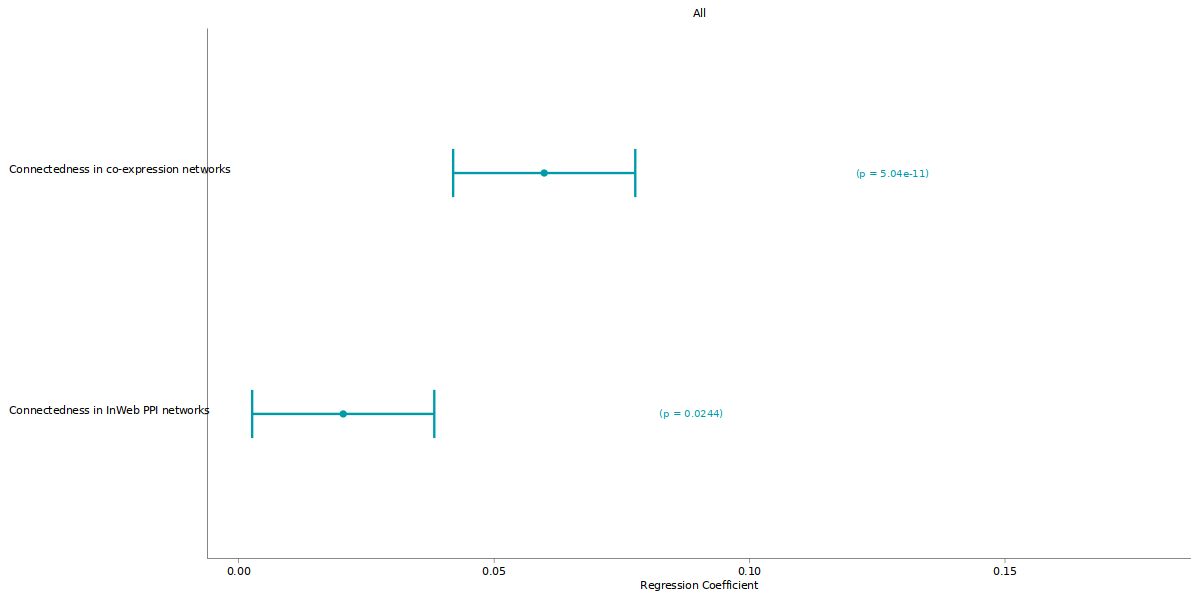

In [533]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =reorder(variable_label, Estimate), y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.5) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2) 
model_plot

In [535]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type,rm_rib_mt_genes, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [536]:
### Save data for plot

In [537]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable,sign,variable_label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
connect_quantile,0.05980493,0.009093687,6.576533,5.044212e-11,0.041981633,0.07762823,connect_quantile,1,Connectedness in co-expression networks
PPI_degree_quantile,0.02046636,0.009093687,2.250612,2.443070e-02,0.002643064,0.03828966,PPI_degree_quantile,1,Connectedness in InWeb PPI networks


In [538]:
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type,rm_rib_mt_genes, '_data.csv'))

In [539]:
head(test,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,weighted_mean_expression,residuals
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,A1BG,HGNC:5,1,ENSG00000121410,1.2613884,-0.5302553,-0.1890112,-0.7228644,0.8427422,7,⋯,-0.8046553,1,0,0,-0.5549247,1,-0.7806656,4,-0.1269236,1.701606
2,A2M,HGNC:7,1,ENSG00000175899,-0.6591235,-0.2184283,1.2938860,-0.7228644,-0.5493879,89,⋯,1.2528822,1,0,0,-0.6186645,90,0.6995575,9,-0.1045367,1.546017


### Residual Model for LOEUF

In [540]:
### Estimate the model ( use residuals after correcting for expression)

In [541]:
model_form = 'residuals ~ LOEUF'

In [542]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [543]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.11565582,0.009120638,-12.680672,1.410130e-36,-0.13353194,-0.09777969,(Intercept)
LOEUF,-0.07655475,0.009121076,-8.393171,5.346048e-17,-0.09443173,-0.05867777,LOEUF


In [544]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [545]:
coef = coef[coef$variable != '(Intercept)',]

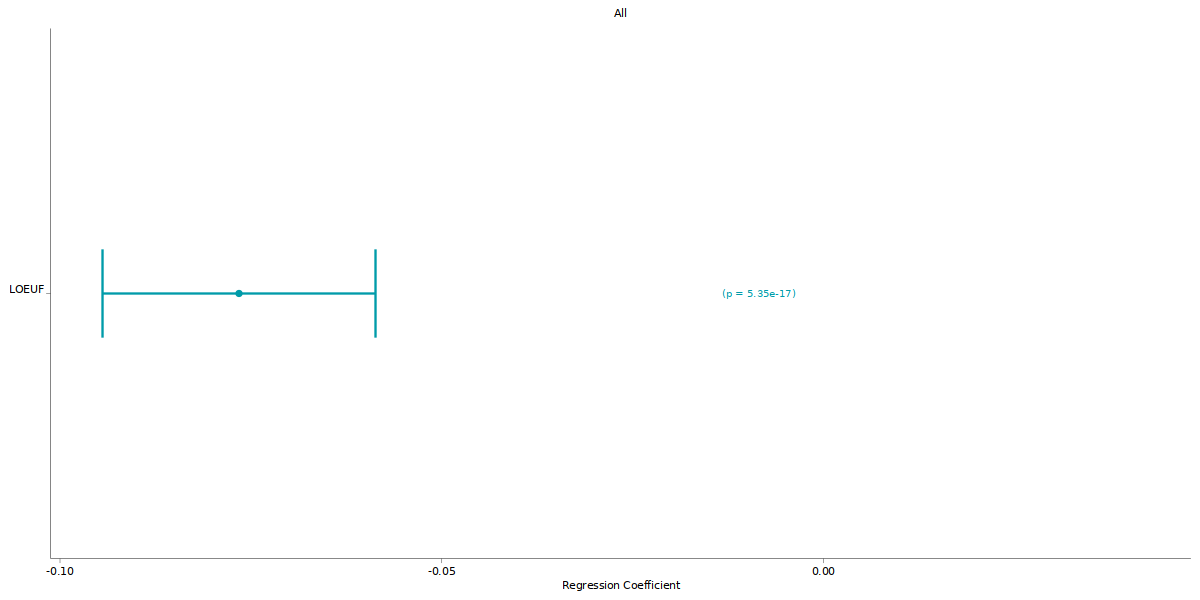

In [546]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.5) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [547]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, rm_rib_mt_genes,'.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [548]:
### Save LOEUF data

In [549]:
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, rm_rib_mt_genes,'_data.csv'))

In [550]:
### Make boxplot based on residuals (regress out expression out of LOEUFscore)

In [551]:
head(test,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,weighted_mean_expression,residuals
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,A1BG,HGNC:5,1,ENSG00000121410,1.2613884,-0.5302553,-0.1890112,-0.7228644,0.8427422,7,⋯,-0.8046553,1,0,0,-0.5549247,1,-0.7806656,4,-0.1269236,1.701606
2,A2M,HGNC:7,1,ENSG00000175899,-0.6591235,-0.2184283,1.2938860,-0.7228644,-0.5493879,89,⋯,1.2528822,1,0,0,-0.6186645,90,0.6995575,9,-0.1045367,1.546017


In [552]:
nrow(test[is.na(test$LOEUF),])

[1] 101

In [553]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)
test = test[!is.na(test$LOEUF),]

res = residuals(glm(LOEUF ~ weighted_mean_expression, data = test, family = 'gaussian'))   # select the beta of the random snp instead

## Add residuals to data
        
test$residuals = res

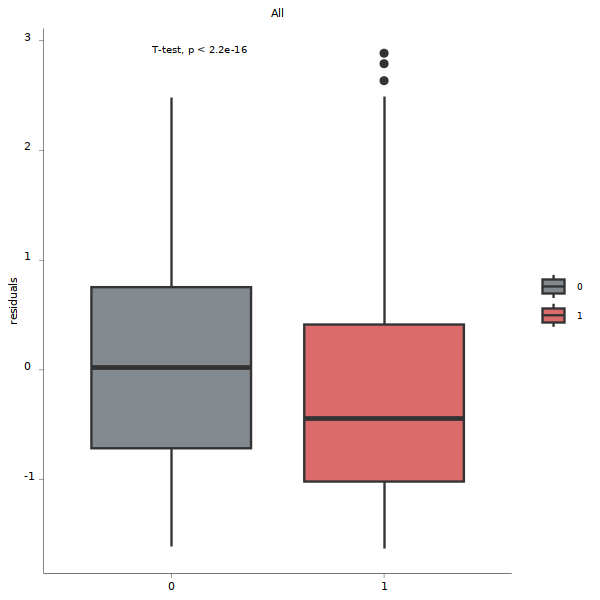

In [554]:
options(repr.plot.width = 5, repr.plot.height = 5)
loeuf_plot = ggplot(test, aes(x=as.character(sign), y=residuals, fill = as.character(sign))) +  coeqtl_fill + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test", size = 2) + ggtitle(cell_type) + theme(axis.title.x = element_blank())
loeuf_plot

In [555]:
pdf(paste0('figures/I2/I2_LOEUF_Score_residuals', cell_type,rm_rib_mt_genes, '.pdf'), width =2, height = 1.8)
loeuf_plot
dev.off()

pdf 
  2

### Residual Model for GO

In [556]:
### Estimate the model (use residuals after correcting for expression)

In [557]:
model_form = 'residuals ~ GO_BP_count_400_auc'

In [558]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [559]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.1186005,0.009090192,-13.047081,1.316347e-38,-0.1364169,-0.1007840,(Intercept)
GO_BP_count_400_auc,0.0395686,0.009090625,4.352682,1.357537e-05,0.0217513,0.0573859,GO_BP_count_400_auc


In [560]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [561]:
coef = coef[coef$variable != '(Intercept)',]

In [562]:
###  adjust label
coef$variable_label = coef$variable
coef$variable_label = str_replace(coef$variable_label, 'GO_BP_count_400_auc', 'Count of BP broadly unrelated GO terms')

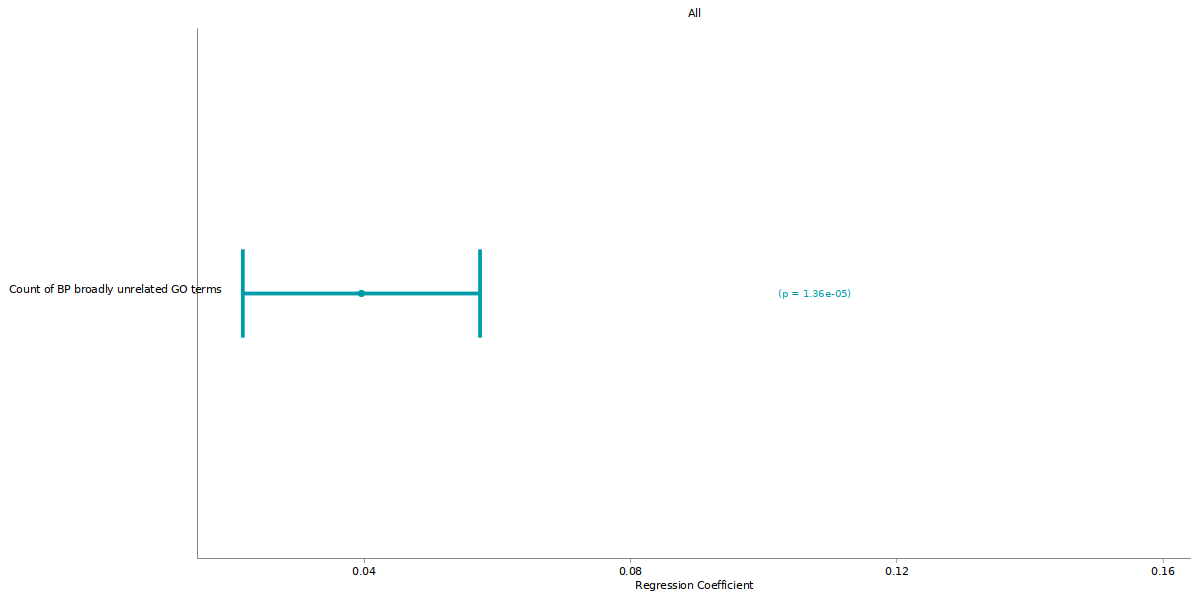

In [563]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =reorder(variable_label, Estimate), y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [564]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, rm_rib_mt_genes, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [565]:
#### Save data of model
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type,rm_rib_mt_genes, '_data.csv'))

## GnomAD Features

In [566]:
coegene_data$sign = as.numeric(coegene_data$sign)

In [567]:
### LOEUF score from gnomAD

In [568]:
t_result <- t.test(LOEUF ~ sign, data = coegene_data)

In [569]:
t_result$p.value

[1] 4.844257e-50

Warning message:
"Removed 101 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 101 rows containing non-finite outside the scale range (`stat_compare_means()`)."


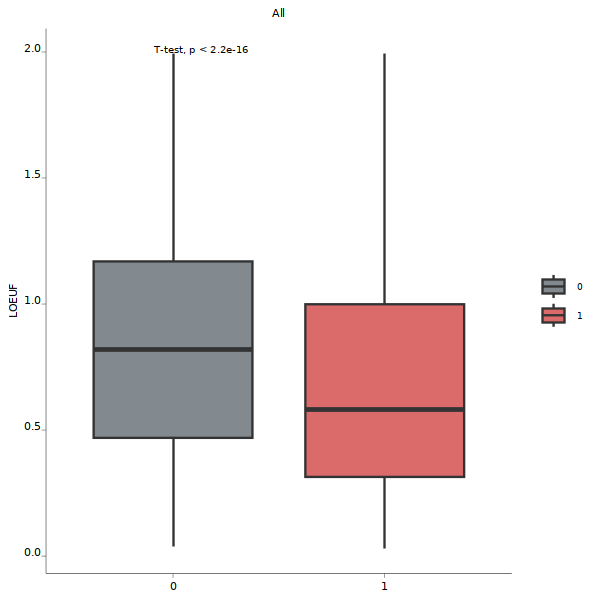

In [570]:
options(repr.plot.width = 5, repr.plot.height = 5)
loeuf_plot = ggplot(coegene_data, aes(x=as.character(sign), y=LOEUF, fill = as.character(sign))) +  coeqtl_fill + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test", size = 2) + ggtitle(cell_type) + theme(axis.title.x = element_blank())
loeuf_plot

In [571]:
pdf(paste0('figures/I2/I2_LOEUF_Score_', cell_type,rm_rib_mt_genes, '.pdf'), width =2, height = 1.8)
loeuf_plot
dev.off()

Warning message:
"Removed 101 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 101 rows containing non-finite outside the scale range (`stat_compare_means()`)."


pdf 
  2

In [572]:
### Save data for LOEUF score

In [573]:
write.csv(coegene_data[,c('coeGene', 'sign', 'LOEUF')], paste0('figures/I2/I2_LOEUF_Score_', cell_type, rm_rib_mt_genes,'_data.csv'))